### import package

In [98]:
# pip install lightgbm pandas scikit-learn
# pip install --upgrade lightgbm

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from lightgbm import early_stopping, log_evaluation

### Load data

In [173]:
df = pd.read_csv('D:/Deep_Learning/Keras/PPNCKH/Data/Train_clean.csv')
df_xtest = pd.read_csv('D:/Deep_Learning/Keras/PPNCKH/Data/test_dataset.csv')
df_ytest = pd.read_csv('D:/Deep_Learning/Keras/PPNCKH/Data/sample_submission.csv')

In [174]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205255 entries, 0 to 205254
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   age                                  205255 non-null  int64  
 1   Gender                               205255 non-null  object 
 2   Date_Registered                      205255 non-null  object 
 3   Is_current_loyalty_program_member    205255 non-null  object 
 4   loyalty_points_redeemed              205255 non-null  int64  
 5   loyalty_tier                         205255 non-null  float64
 6   Received_tier_discount_percentage    205255 non-null  float64
 7   Received_card_discount_percentage    205255 non-null  float64
 8   Received_coupon_discount_percentage  205255 non-null  int64  
 9   product_category                     205255 non-null  object 
 10  Product_value                        205255 non-null  int64  
 11  payment_metho

- Setup Target Columns

In [ ]:
taget = ['customer_experience']
drop_colunms = ['Date_Registered',  'Received_tier_discount_percentage',
                'Received_card_discount_percentage', 'Received_coupon_discount_percentage',
                'purchased_datetime', 'payment_datetime',
                'released_date', 'estimated_delivery_date','received_date', 'age',
                'loyalty_points_redeemed','Age-Group','loyalty_tier','Product_value','final_payment','product_category'
                ]
drop_colunms_test = ['Date_Registered',  'Received_tier_discount_percentage',
                    'Received_card_discount_percentage', 'Received_coupon_discount_percentage',
                    'purchased_datetime', 'payment_datetime',
                    'released_date', 'estimated_delivery_date','received_date', 
                    'loyalty_points_redeemed', 'user_id', 'transaction_id', 'order_id','tracking_number','id','Product_value',
                    'final_payment',
                    'loyalty_tier','product_category', 'age'
]
X_train = df.drop(columns=taget)
X_train = X_train.drop(columns=drop_colunms)
y_train = df[taget]

In [178]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205255 entries, 0 to 205254
Data columns (total 5 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             205255 non-null  object
 1   Is_current_loyalty_program_member  205255 non-null  object
 2   payment_method                     205255 non-null  object
 3   purchase_medium                    205255 non-null  object
 4   shipping_method                    205255 non-null  object
dtypes: object(5)
memory usage: 7.8+ MB


- Chia tập test từ tập dữ liệu bên ngoài

In [179]:
X_testing = df_xtest.drop(columns=drop_colunms_test)
y_testing = df_ytest[taget]

- Chia Xtrain, Ytrain

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [159]:
categorical_cols_train = X_train.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')


In [183]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test,  reference=lgb_train)

- Chỉnh ở đây thôi

In [191]:
params = {
    'objective': 'multiclass',         # Phân loại nhiều lớp
    'num_class': 3,                    # Số lượng lớp phân loại (ở đây là 3)
    'boosting_type': 'gbdt',           # Gradient Boosting Decision Tree (mặc định, nhanh và mạnh)
    'metric': 'multi_logloss',         # Hàm đánh giá: log loss cho phân loại nhiều lớp
    'learning_rate': 0.01,             # Tốc độ học – nhỏ hơn để học ổn định hơn
    'max_depth': -1,                   # Không giới hạn độ sâu của cây (LightGBM tự tối ưu)
    'num_leaves': 128,                  # Số lượng lá tối đa (quan trọng, ảnh hưởng độ phức tạp)
    'min_data_in_leaf': 500,            # Số lượng mẫu tối thiểu trong một lá
    'feature_fraction': 0.9,           # Random chọn 90% đặc trưng cho mỗi cây (giúp tránh overfitting)
    'bagging_fraction': 0.8,           # Random chọn 80% dữ liệu cho mỗi vòng lặp boosting
    'verbosity': -1,                   # Tắt log không cần thiết
    'random_state': 42,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,                # Đảm bảo kết quả lặp lại được
}

- Chạy ô này với ô ở dưới

- Kết quả tới khoảng 0.3 - 0.5 là oke

In [ ]:
model = LGBMClassifier(**params, n_estimators=1000)
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='multi_logloss',
    callbacks=[
        early_stopping(stopping_rounds=50), # dừng sớm nếu không cải thiện sau 50 vòng
        log_evaluation(50)
    ],
    categorical_feature=categorical_cols_train
)

d:\Deep_Learning\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Deep_Learning\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
d:\Deep_Learning\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Training until validation scores don't improve for 50 rounds
[50]	valid_0's multi_logloss: 1.04907
[100]	valid_0's multi_logloss: 1.03925
[150]	valid_0's multi_logloss: 1.03319
[200]	valid_0's multi_logloss: 1.02882
[250]	valid_0's multi_logloss: 1.02555
[300]	valid_0's multi_logloss: 1.02392
[350]	valid_0's multi_logloss: 1.0226
[400]	valid_0's multi_logloss: 1.02166
[450]	valid_0's multi_logloss: 1.02091
[500]	valid_0's multi_logloss: 1.02041
[550]	valid_0's multi_logloss: 1.01988
[600]	valid_0's multi_logloss: 1.01954
[650]	valid_0's multi_logloss: 1.01919
[700]	valid_0's multi_logloss: 1.01899
[750]	valid_0's multi_logloss: 1.01881
[800]	valid_0's multi_logloss: 1.01865
[850]	valid_0's multi_logloss: 1.01837
[900]	valid_0's multi_logloss: 1.01824
[950]	valid_0's multi_logloss: 1.01818
[1000]	valid_0's multi_logloss: 1.01822
Did not meet early stopping. Best iteration is:
[965]	valid_0's multi_logloss: 1.01817


LGBMClassifier(bagging_fraction=0.8, feature_fraction=0.9, lambda_l1=0.1,
               lambda_l2=0.1, learning_rate=0.01, metric='multi_logloss',
               min_data_in_leaf=500, n_estimators=1000, num_class=3,
               num_leaves=128, objective='multiclass', random_state=42,
               verbosity=-1)

In [193]:
y_pred = model.predict(X_test)

In [194]:
results = model.evals_result_

- Run chỗ này sao cho biểu đồ luôn luôn giảm và đi xuống

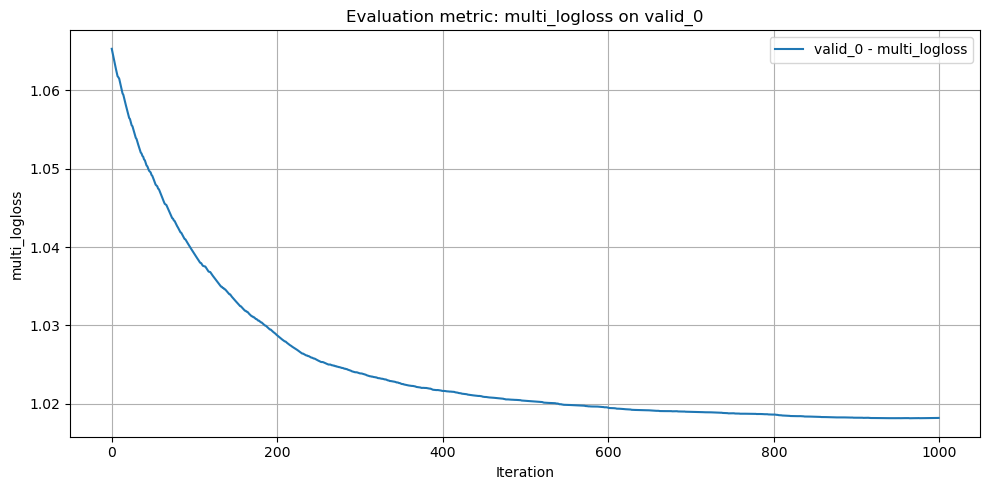

In [195]:
for data_name, metrics in results.items():
    for metric_name, values in metrics.items():
        plt.figure(figsize=(10, 5))
        plt.plot(values, label=f"{data_name} - {metric_name}")
        plt.title(f"Evaluation metric: {metric_name} on {data_name}")
        plt.xlabel("Iteration")
        plt.ylabel(metric_name)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [197]:
y_pred = model.predict(X_testing)

ValueError: train and valid dataset categorical_feature do not match.

In [ ]:
print("Accuracy:", accuracy_score(y_testing, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.43241333950451877
Classification Report:
               precision    recall  f1-score   support

         bad       0.37      0.09      0.15     13695
        good       0.45      0.79      0.57     17934
     neutral       0.38      0.25      0.30      9422

    accuracy                           0.43     41051
   macro avg       0.40      0.38      0.34     41051
weighted avg       0.41      0.43      0.37     41051

